<a href="https://colab.research.google.com/github/yeonjunky/learn_ml/blob/main/1_Least_Squares_Estimation_(Scikit_learn_LinearRegression%2C_%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


![image.png](attachment:image.png)

<br>
<br>

#### 1-1. (미국 보스턴의 주택 가격) 데이터 읽어들이기

#### 1) Features

In [6]:
df_data = pd.read_excel('/content/drive/MyDrive/ai/실습 파일/1. Scikit-learn (Problem)/boston_house_data.xlsx', index_col=0) # 엑셀 파일 읽기
df_data.head() # 윗부분만 보려면?

# Column == Attirbute == Dimension == Feature(only X data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [12]:
print(df_data[3].value_counts())
print(df_data[8].value_counts(sort=False))

0    471
1     35
Name: 3, dtype: int64
1      20
2      24
3      38
5     115
4     110
8      24
6      26
7      17
24    132
Name: 8, dtype: int64


In [9]:
from collections import Counter
Counter(df_data[3])

Counter({0: 471, 1: 35})

#### df_data (Data, x)

- 0 : **범죄율**
- 1 : **25,000 평방피트를 초과하는 거주지역 비율**
- 2 : **비소매상업지역 면적 비율** 
- 3 : **찰스강의 경계에 위치한 경우는 1, 아니면 0**
- 4 : **일산화질소 농도**
- 5 : **주택당 방 수 (거실 외 subroom)**
- 6 : **1940년 이전에 건축된 주택의 비율**
- 7 : **직업센터의 거리**
- 8 : **방사형 고속도로까지의 거리**
- 9 : **재산세율**
- 10 : **학생/교사 비율**
- 11 : **인구 중 흑인 비율**
- 12 : **인구 중 하위 계층 비율**

#### 2) Target

In [7]:
df_target = pd.read_excel('/content/drive/MyDrive/ai/실습 파일/1. Scikit-learn (Problem)/boston_house_target.xlsx', index_col=0)
df_target.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


#### df_target (Target, y)
- Town 내 주택 가격의 중앙값 (단위 : $1,000)

# Feature Normalization (Scaling)
Numerical Column -> Min-max algorothm or Standardization
Categorical Column -> One-hot encoding

#### 3) Features & Target 합쳐서 살펴보기

In [13]:
df_main = pd.concat([df_data, df_target], axis=1) # concatenate
df_main.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
# 열 이름 통째로 바꾸기
df_main.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'] 
df_main.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
df_main.describe() # description

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<br>
<br>

#### 1-2. Dataframe 을 Numpy array (배열, 행렬)로 바꿔주기

In [16]:
# A Visual Intro to NumPy and Data Representation @ http://j.mp/2NtZbSd

boston_data = np.array(df_data)
boston_target = np.array(df_target)

In [17]:
boston_data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [18]:
type(boston_data) # 무슨 타입?

numpy.ndarray

In [19]:
boston_target

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [20]:
type(boston_target)

numpy.ndarray

In [21]:
# array 의 차원수 확인 (506개의 데이터, 13개의 Data features)

boston_data.shape # '모양'을 영어로

(506, 13)

In [ ]:
# array 의 차원수 확인 (506개의 라벨값)

boston_target.

(506, 1)

<br>
<br>

#### 2. Feature 선택하기

In [ ]:
# Use only one feature 

# 항상 행렬 형태로 뽑아서 모델에게 던져줘야 합니다
boston_X = boston_data[:, 12:13] # 인구 중 하위 계층 비율 
boston_X

In [ ]:
sample_matrix = np.array(?)

In [ ]:
sample_matrix[?]

In [ ]:
boston_Y = boston_target
boston_Y

array([[ 24. ],
       [ 21.6],
       [ 34.7],
       [ 33.4],
       [ 36.2],
       [ 28.7],
       [ 22.9],
       [ 27.1],
       [ 16.5],
       [ 18.9],
       [ 15. ],
       [ 18.9],
       [ 21.7],
       [ 20.4],
       [ 18.2],
       [ 19.9],
       [ 23.1],
       [ 17.5],
       [ 20.2],
       [ 18.2],
       [ 13.6],
       [ 19.6],
       [ 15.2],
       [ 14.5],
       [ 15.6],
       [ 13.9],
       [ 16.6],
       [ 14.8],
       [ 18.4],
       [ 21. ],
       [ 12.7],
       [ 14.5],
       [ 13.2],
       [ 13.1],
       [ 13.5],
       [ 18.9],
       [ 20. ],
       [ 21. ],
       [ 24.7],
       [ 30.8],
       [ 34.9],
       [ 26.6],
       [ 25.3],
       [ 24.7],
       [ 21.2],
       [ 19.3],
       [ 20. ],
       [ 16.6],
       [ 14.4],
       [ 19.4],
       [ 19.7],
       [ 20.5],
       [ 25. ],
       [ 23.4],
       [ 18.9],
       [ 35.4],
       [ 24.7],
       [ 31.6],
       [ 23.3],
       [ 19.6],
       [ 18.7],
       [ 16. ],
       [

<br>
<br>

#### 3. Training & Test set 으로 나눠주기

In [ ]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(boston_X, boston_Y, test_size=0.3, random_state=0)
# random_state (random_seed or seed) : make the result reproducible

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 1)
(152, 1)
(354, 1)
(152, 1)


<br>
<br>

#### 4. 비어있는 모델 객체 만들기

![image.png](attachment:image.png)

In [ ]:
from sklearn import linear_model

model = linear_model.?() # 선형회귀

<br>
<br>

#### 5. 모델 객체 학습시키기 (on training data)

In [ ]:
# Train the model using the training sets

model.?(x_train, y_train) # 모델에 데이터를 '맞춰줍니다'

In [ ]:
print('Coefficients: ', model.?)

Coefficients:  [[-0.96814078]]


In [ ]:
print('Intercepts: ', model.?)

In [ ]:
# y = ? x + ?

<br>
<br>

#### 6. 학습이 끝난 모델 테스트하기 (on test data)

In [ ]:
model.?(x_train) # '예측하다'

array([[  1.47605623],
       [ 27.30605233],
       [ 18.3701129 ],
       [ 29.9781209 ],
       [ 17.43101634],
       [ 16.66618512],
       [ 22.11681773],
       [ 14.43946132],
       [  9.18245687],
       [ 24.85665615],
       [ 30.34601439],
       [ 29.70704148],
       [ 26.99624728],
       [ 22.40725997],
       [ 27.33509656],
       [ 27.79980413],
       [ 27.24796389],
       [ 18.96067878],
       [ 30.54932396],
       [ 10.67339367],
       [ 20.60651811],
       [ 29.46500628],
       [ 21.87478254],
       [ 13.70367433],
       [ 20.17085476],
       [ 14.32328443],
       [ 23.50125906],
       [ 25.660213  ],
       [ 19.07685567],
       [ 20.73237641],
       [ 25.30200091],
       [ 23.52062187],
       [ 16.72427357],
       [ 29.87162541],
       [ 25.59244315],
       [ 28.9906173 ],
       [ 30.4815541 ],
       [ 19.08653708],
       [ 11.5737646 ],
       [ 23.89819678],
       [ 29.27137812],
       [ 23.65616158],
       [ 31.73045571],
       [ 28

In [ ]:
# 354개 Train 데이터에 대한 Model 의 Mean squared error 
print('MSE(Training data) : ', np.mean((model.predict(x_train) - y_train) ** 2))

Mean squared error: 37.933978172880295


In [ ]:
# Use this!
from sklearn.metrics import ?

print('MSE(Training data) : ', ?(model.predict(x_train), y_train))

MSE:  37.9339781729


In [ ]:
# 152개 Test 데이터에 대한 Model 의 Mean squared error 
print('MSE(Test data) : ', ?(model.predict(x_test), y_test))

MSE(Test data) :  39.8171505047


In [ ]:
# Square root of error
np.sqrt( ?(model.predict(x_test), y_test) )

6.3100832407143539

<br>
<br>

#### 7. 모델 시각화

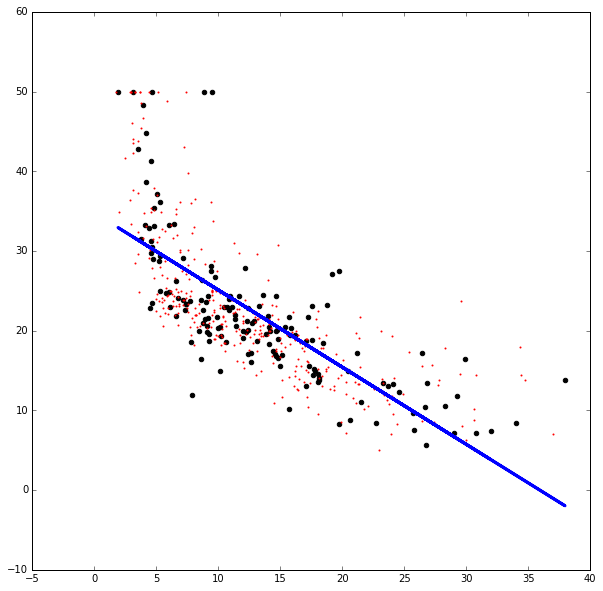

In [ ]:
plt.figure(figsize=(10, 10))

plt.scatter(x_test, y_test, color="black") # Test data
plt.scatter(x_train, y_train, color="red", s=1) # Train data

plt.plot(x_test, model.predict(x_test), color="blue", linewidth=3) # Fitted line

plt.show()

<br>
<br>

#### Practice. 더 좋은 성능을 보이는 Feature 를 찾아보세요!

MSE(Training data) :  37.9339781729
MSE(Test data) :  39.8171505047


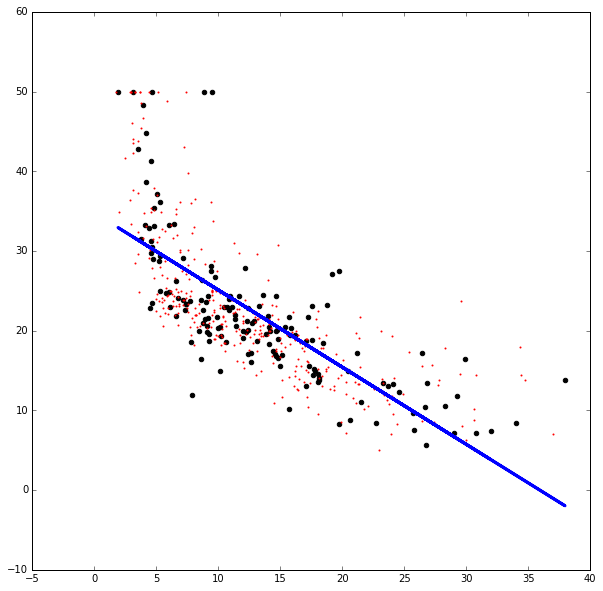

In [ ]:
from sklearn import model_selection, linear_model
from sklearn.metrics import mean_squared_error

# 1. Prepare the data (array!)
boston_data = np.array(df_data)
boston_target = np.array(df_target)

# 2. Feature selection
boston_X = boston_data[:, 12:13] 
boston_Y = boston_target

# 3. Train/Test split
x_train, x_test, y_train, y_test = model_selection.train_test_split(boston_X, boston_Y, test_size=0.3, random_state=0)

# 4. Create model object 
model = linear_model.LinearRegression()

# 5. Train the model 
model.fit(x_train, y_train)

# 6. Test the model
print('MSE(Training data) : ', mean_squared_error(model.predict(x_train), y_train))
print('MSE(Test data) : ', mean_squared_error(model.predict(x_test), y_test))

# 7. Visualize the model
plt.figure(figsize=(10, 10))
plt.scatter(x_test, y_test, color="black") # Test data
plt.scatter(x_train, y_train, color="red", s=1) # Train data
plt.plot(x_test, model.predict(x_test), color="blue", linewidth=3) # Fitted line
plt.show()